# Problem set #6
### by Alexander Tyan, February 26, 2018

## 1).
### a). Split the data into a training set (70%) and a test set (30%). Be sure to set your seed prior to this part of your code to guarantee reproducibility of results.

In [176]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

biden_df = pd.read_csv('biden.csv')
# Check for nulls.
print(biden_df.isnull().sum())
# See the data:
print(biden_df)
# Capture field names:
cols = biden_df.columns.values
y_col_name = cols[0]
x_col_names = []
for col_name in cols[1:]:
    x_col_names.append(col_name)
x_col_names

biden     0
female    0
age       0
educ      0
dem       0
rep       0
dtype: int64
      biden  female  age  educ  dem  rep
0        90       0   19    12    1    0
1        70       1   51    14    1    0
2        60       0   27    14    0    0
3        50       1   43    14    1    0
4        60       1   38    14    0    1
5        85       1   27    16    1    0
6        60       1   28    12    0    0
7        50       0   31    15    1    0
8        50       1   32    13    0    0
9        70       0   51    14    1    0
10       50       0   26    12    0    0
11       70       1   48    12    1    0
12       60       0   59    11    0    0
13       30       0   20    14    0    0
14       50       0   31    15    0    0
15       85       0   49    11    0    0
16       70       0   18    12    0    1
17       85       0   69    10    1    0
18       70       1   37    14    0    0
19       60       0   63    11    1    0
20       50       1   19    13    0    1
21       85  

['female', 'age', 'educ', 'dem', 'rep']

In [177]:
y = biden_df[y_col_name].values  #"biden" column values
X = biden_df[x_col_names].values  # All other columns

In [178]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)

### Use recursive binary splitting to fit a decision tree to the training data, with biden as the response variable and the other variables as predictors.

In [179]:
biden_tree1 = DecisionTreeRegressor()
biden_tree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Plot the tree and interpret the results. What is the test MSE?

In [180]:
biden_tree1_viz = export_graphviz(
    biden_tree1,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names = x_col_names,
    class_names = y_col_name
)

graph = graphviz.Source(biden_tree1_viz)
graph.render('biden_tree1_viz')
graph

In [181]:
y_pred = biden_tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE =', MSE1)

MSE = 701.576727146


MSE = 693.569514132,

Interpretation: With given pruning parameters(no limit on depth and minimum number of observations in the leaf no=des), as well as using ALL features of the set to predict the Biden feeling thermometer, and based on our particular random draw of a training set, the following birfurcation points minimize the variance (i.e. residuals) of the feeling thermometer in each corresponding region created by the tree divisions:

First, we split the data set according to all observations t1 <= 0.5 of the democrat variable (with left partition having 724 observations and biden thermometer of 52.8 and right one - 540 observations, with thermometer 74.7). This could be interpreted as, on average, in our training set, individuals who are "more democratic" feel "warmer" toward Joe Biden and there are also less of them in that bifurcation choice. Then the t2 <= 0.5 of the republican variable (i.e. split into "less" and "more" republican) on the left node (among those "less democrat", "more republican" seem to like Biden less with 42 vs 58 biden thermomter value) and t3 <= 54.5 according to age on the right node (among those "less democrat", older people seem to like Joe Biden a little more, 78 vs 72 "degrees") ... and so on down the tree in THAT ORDER. We can see how well our predicted thermometer values matched the actual test theromometer values. This gives us the average of the (squared) differences (i.e. the MSE) of between the predicted and actual in the test set of 693.569514132. This means that, on average, our tree is 693.569514132 squared thermometer units off of what we observe in the hold-out set (taking a square root of that equates to about 26.3 thermometer "degree" units).

### b). Leave the control options for tree() at their default values. Now fit another tree to the training data with the following control options: tree(control = tree.control(nobs = # number of rows in the training set, mindev = 0)) Use cross-validation to determine the optimal level of tree complexity, plot the optimal tree, and interpret the results. Does pruning the tree improve the test MSE?

With minimum samples in the leaf = 5, best maximum depth paramter is:
max_depth = 3
with MSE = 396.193714632


Text(0,0.5,'MSE')

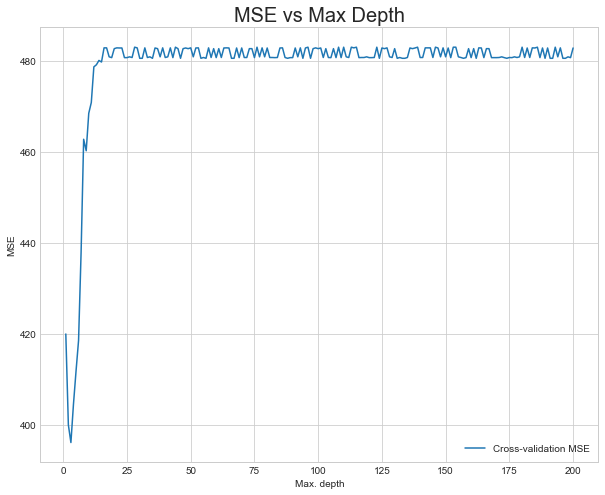

In [182]:
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

max_samples = 200
MSE_vec = np.zeros(max_samples)

minimum_record = (None, 1000)
for i in range(1, max_samples + 1):
    biden_tree_try = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    biden_tree_try.fit(X_train, y_train)
    y_pred = biden_tree_try.predict(X_test)
    MSE_try = mean_squared_error(y_test, y_pred)
    MSE_vec[i - 1] = MSE_try
    depth, MSE = minimum_record
    if MSE_try < MSE:
        minimum_record = (i, MSE_try)

print("With minimum samples in the leaf = 5, best maximum depth paramter is:")
print("max_depth =", minimum_record[0])
print("with MSE =", minimum_record[1])
    
plt.plot(np.arange(1, max_samples + 1), MSE_vec, label='Cross-validation MSE')
plt.legend(loc='best')
plt.title('MSE vs Max Depth', fontsize=20)
plt.xlabel(r'Max. depth')
plt.ylabel(r'MSE')

In [183]:
biden_tree2 = DecisionTreeRegressor(max_depth=minimum_record[0], min_samples_leaf=5)
biden_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

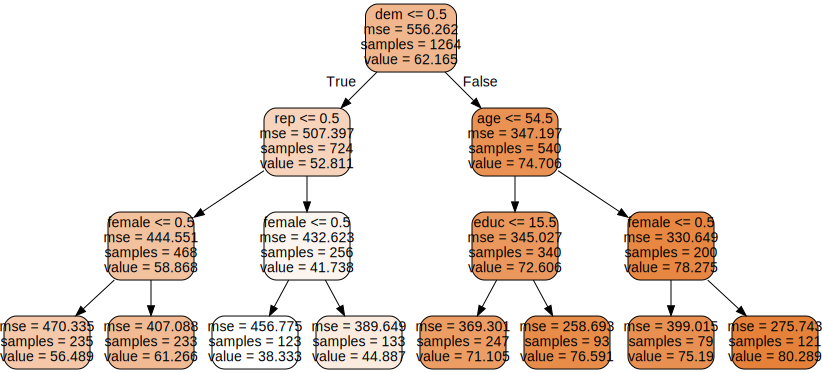

In [184]:
biden_tree2_viz = export_graphviz(
    biden_tree2,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names = x_col_names,
    class_names = y_col_name
)

graph = graphviz.Source(biden_tree2_viz)
graph.render('biden_tree2_viz')
graph

Interpretation: With given pruning parameters(limit on depth = 3 and minimum number of observations in the leaf = 5), as well as using ALL features of the set to predict the Biden feeling thermometer, and based on our particular random draw of a training set, the following birfurcation points minimize the variance (i.e. residuals) of the feeling thermometer in each corresponding region created by the tree divisions:

First, we split the data set according to all observations t1 <= 0.5 of the democrat variable (with left partition having 724 observations and biden thermometer of 52.8 and right one - 540 observations, with thermometer 74.7). This could be interpreted as, on average, in our training set, individuals who are "more democratic" feel "warmer" toward Joe Biden and there are also less of them in that bifurcation choice. Then the t2 <= 0.5 of the republican variable (i.e. split into "less" and "more" republican) on the left node (among those "less democrat", "more republican" seem to like Biden less with 42 vs 58 biden thermomter value) and t3 <= 54.5 according to age on the right node (among those "less democrat", older people seem to like Joe Biden a little more, 78 vs 72 "degrees") ... and so on down the tree in THAT ORDER. Following this process, we end up with the following regions: Region 1 will have 235 observations and PREDICTED biden thermometer value of 56.489, Region 2 will have 233 with PREDICTED thermometer value of 61.266, and so forth down the line of leaf/end nodes, each of which corresponds to a final region. When we divide our test set into such regions, we can see how well our predicted thermometer values matched the actual test theromometer values. This gives us the average of the (squared) differences (i.e. the MSE) of between the predicted and actual in the test set of 396.1937. This means that, on average, our tree is 396.19 squared thermometer units off of what we observe in the hold-out set (taking a square root of that equates to about 19.9 thermometer "degree" units). As can be seen from the chart, prunning to max depth = 3 and generally does improve the test MSE.

###  c). Use the bagging approach to estimate a tree to create a model for predicting biden. What test MSE do you obtain?

In [185]:
from sklearn.ensemble import BaggingRegressor
biden_tree_bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
biden_tree_bagging.fit(X, y)
biden_tree_bagging.score(X, y)
y_pred_bagging = biden_tree_bagging.oob_prediction_
MSE_bagging = mean_squared_error(y, y_pred_bagging)
print('MSE_bagging =', MSE_bagging)

MSE_bagging= 406.000558395


### Obtain variable importance measures and interpret the results.

In [186]:
import operator
# Average out over all importances:
female_importance = []
age_importance = []
educ_importance = []
dem_importance = []
rep_importance = []
for one_tree in biden_tree_bagging.estimators_:
    female_importance.append(one_tree.feature_importances_[0])
    age_importance.append(one_tree.feature_importances_[1])
    educ_importance.append(one_tree.feature_importances_[2])
    dem_importance.append(one_tree.feature_importances_[3])
    rep_importance.append(one_tree.feature_importances_[4])

mean_female_importance = np.mean(female_importance)
mean_age_importance = np.mean(age_importance)
mean_educ_importance = np.mean(educ_importance)
mean_dem_importance = np.mean(dem_importance)
mean_rep_importance = np.mean(rep_importance)
importances = [mean_female_importance, mean_age_importance, mean_educ_importance, mean_dem_importance, mean_rep_importance]
feature_importance_dict = {}
for i in range(len(importances)):
    feature_importance_dict[x_col_names[i]] = importances[i]

sorted_features = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)
for i in range(len(sorted_features)):
    feature, importance = sorted_features[i]
    print(i + 1, feature, ": ", importance)

1 age :  0.442912703961
2 educ :  0.200576259716
3 dem :  0.190323544392
4 rep :  0.106028225513
5 female :  0.060159266419


According to our bagging method with samples and number of trees both at 100, our average error, calculated as a mean of squared errors between the in-bag predictions and out-of bag of biden temperatures for individuals, is larger (406 vs 396). I.e. with our bagging parameters, our estimates of Biden temperature are not as good as in our simple one-tree method in (b) with max depth 3 and max node leafs 5. According to our averages of relative features importance, age is the most important by far in determining whether a person may be more or less "warm" towards Joe Biden; followed by education, whether they are democrat or not, then by whether they are republicant, and then by the gender of the respondent.

### d). Use the random forest approach to estimate a tree to create a model for predicting biden. Do this for m = 1, m = 2, and m = 3 (the number of variables).

In [187]:
from sklearn.ensemble import RandomForestRegressor

biden_tree_randforest = RandomForestRegressor(n_estimators=100, max_features=1, bootstrap=True,
                                  oob_score=True, random_state=15)
biden_tree_randforest.fit(X, y)

biden_tree_randforest.score(X, y)
y_pred_randforest = biden_tree_randforest.oob_prediction_
MSE_randforest = mean_squared_error(y, y_pred_randforest)

In [188]:
biden_tree_randforest2 = RandomForestRegressor(n_estimators=100, max_features=2, bootstrap=True,
                                  oob_score=True, random_state=15)
biden_tree_randforest2.fit(X, y)

biden_tree_randforest2.score(X, y)
y_pred_randforest2 = biden_tree_randforest2.oob_prediction_
MSE_randforest2 = mean_squared_error(y, y_pred_randforest2)

In [189]:
biden_tree_randforest3 = RandomForestRegressor(n_estimators=100, max_features=3, bootstrap=True,
                                  oob_score=True, random_state=15)
biden_tree_randforest3.fit(X, y)

biden_tree_randforest3.score(X, y)
y_pred_randforest3 = biden_tree_randforest3.oob_prediction_
MSE_randforest3 = mean_squared_error(y, y_pred_randforest3)

### What test MSE do you obtain in each case?

In [190]:
print('MSE_randforest(m=1) =', MSE_randforest)
print('MSE_randforest(m=2) =', MSE_randforest2)
print('MSE_randforest(m=3) =', MSE_randforest3)

MSE_randforest(m=1) = 530.846244653
MSE_randforest(m=2) = 535.734919575
MSE_randforest(m=3) = 529.067842604


### Obtain variable importance measures and interpret the results.

In [191]:
forest_m1_importances = biden_tree_randforest.feature_importances_
feature_importance_dict = {}
for i in range(len(forest_m1_importances)):
    feature_importance_dict[x_col_names[i]] = forest_m1_importances[i]

print("For m=1, variable importances:")
sorted_features = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)
for i in range(len(sorted_features)):
    feature, importance = sorted_features[i]
    print(i + 1, feature, ": ", importance)

For m=1, variable importances:
1 age :  0.512488272091
2 dem :  0.186067270405
3 educ :  0.149132921787
4 rep :  0.130145660881
5 female :  0.0221658748364


In [192]:
forest_m2_importances = biden_tree_randforest2.feature_importances_
feature_importance_dict = {}
for i in range(len(forest_m2_importances)):
    feature_importance_dict[x_col_names[i]] = forest_m2_importances[i]

print("For m=2, variable importances:")
sorted_features = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)
for i in range(len(sorted_features)):
    feature, importance = sorted_features[i]
    print(i + 1, feature, ": ", importance)

For m=2, variable importances:
1 age :  0.509860910286
2 dem :  0.188200497016
3 educ :  0.150197826278
4 rep :  0.129923130084
5 female :  0.0218176363351


In [193]:
forest_m3_importances = biden_tree_randforest3.feature_importances_
feature_importance_dict = {}
for i in range(len(forest_m3_importances)):
    feature_importance_dict[x_col_names[i]] = forest_m3_importances[i]

print("For m=3, variable importances:")
sorted_features = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)
for i in range(len(sorted_features)):
    feature, importance = sorted_features[i]
    print(i + 1, feature, ": ", importance)

For m=3, variable importances:
1 age :  0.486410244184
2 dem :  0.201272984114
3 educ :  0.162942100787
4 rep :  0.120179231616
5 female :  0.0291954392984


For all three random tree models, our trees consistently rank the variable importance as age > dem > educ > rep > female. I.e. in predicting how warm/cold one may field toward Joe Biden, age is the most important, followed by whether they are democrat or not, education level, etc. This is somewhat different than our bagging results in (c), where the results are similar, but dem and educ traded places. Perhaps this is not surprising as, in (c), the relative importance values between these two variables were quite close (.20 vs .19).  

### Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [194]:
print('MSE_randforest(m=1) =', MSE_randforest)
print('MSE_randforest(m=2) =', MSE_randforest2)
print('MSE_randforest(m=3) =', MSE_randforest3)

MSE_randforest(m=1) = 530.846244653
MSE_randforest(m=2) = 535.734919575
MSE_randforest(m=3) = 529.067842604


We see that, with increasing m, our error rate decreases. This is not surprising as we are starting with a very low number of m variables, so increasing it slightly would likely increase our predictive ability, until we may hit some sqrt(P) value where P is the number of all features, at which point perhaps our error rates may start increasing again, though we cannot be sure.  